In [1]:
#Load Librarues
import numpy as np
import pandas as pd
import sklearn.feature_extraction
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
#Feature hashing technique
dataframe = pd.read_csv("F:\Sid\Learnings\Data Scientist\Examples\Similar Companies Clustering using FeatureHashing and CountVectorizer\Wikipedia SP 500 Dataset.csv")\

dataframe.head()

,Title,Category,Text
0,Apple Inc.,Information Technology,nasdaq 100 component s p 500 component founda...
1,Adobe Systems,Information Technology,br nasdaq 100 nasdaq 100 component br s p 500...
2,General Motors,Consumer Discretionary,s p 500 s p 500 component industry automotive...
3,General Electric,Energy,s p 500 s p 500 component industry conglomera...
4,Harley-Davidson,Consumer Discretionary,br s p 500 s p 500 component foundation 1903 ...


In [9]:
kmeans.labels_

array([9, 4, 1, 1, 3, 8, 1, 0, 1, 0, 0, 7, 1, 1, 0, 1, 4, 0, 0, 1, 3, 4, 0,
       5, 4, 0, 3, 4, 1, 4, 7, 2, 0, 1, 4, 5, 3, 0, 4, 0, 7, 7, 4, 0, 1, 4,
       4, 0, 0, 1, 4, 4, 7, 4, 4, 4, 4, 7, 0, 1, 1, 4, 7, 5, 1, 0, 0, 5, 5,
       0, 1, 0, 5, 1, 5, 4, 4, 4, 0, 1, 0, 2, 0, 0, 0, 0, 2, 4, 1, 0, 0, 0,
       1, 0, 4, 0, 0, 5, 0, 4, 4, 0, 5, 4, 0, 5, 0, 0, 0, 5, 5, 5, 0, 5, 5,
       5, 5, 5, 0, 4, 4, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 5, 5, 1, 0, 4, 4, 0,
       4, 1, 0, 4, 5, 5, 4, 0, 0, 5, 1, 5, 0, 0, 4, 5, 4, 5, 5, 5, 4, 0, 4,
       1, 0, 4, 5, 4, 4, 0, 0, 0, 0, 0, 5, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 5,
       0, 7, 4, 1, 0, 5, 4, 5, 0, 0, 5, 0, 0, 0, 0, 0, 4, 0, 4, 5, 5, 5, 1,
       0, 0, 0, 4, 5, 5, 5, 5, 4, 5, 0, 0, 0, 0, 5, 5, 5, 5, 4, 0, 0, 5, 5,
       5, 0, 5, 0, 5, 0, 0, 0, 0, 5, 0, 5, 5, 5, 5, 5, 5, 4, 5, 5, 0, 5, 4,
       0, 5, 5, 5, 5, 5, 4, 5, 5, 5, 0, 0, 0, 5, 5, 4, 5, 5, 5, 5, 0, 4, 0,
       0, 0, 5, 0, 0, 0, 0, 1, 5, 5, 4, 5, 0, 5, 5, 5, 0, 5, 5, 0, 5, 5, 5,
       5, 5,

In [3]:
#Implement kmeans with CountVectorizer
#def countVectorizer():
vectorizer = CountVectorizer()
text = vectorizer.fit_transform(dataframe.Text).toarray()
pca = PCA(n_components=10)
mod_text = pca.fit_transform(text)

dataset = pd.DataFrame(mod_text)

#-----Convert to categorical variable
#dataset.Title = dataset.Title.astype('category')
kMeansModel = KMeans(n_clusters=10)
kmeans = kMeansModel.fit(dataset)

In [8]:
text.shape
len(dataframe)

466

In [ ]:
#Implement kmeans with FeatureHAsher
#def countVectorizer():
vectorizer = CountVectorizer()
text = vectorizer.fit_transform(dataframe.Text).toarray()
pca = PCA(n_components=10)
mod_text = pca.fit_transform(text)

dataset = pd.DataFrame(mod_text)

#-----Convert to categorical variable
#dataset.Title = dataset.Title.astype('category')
kMeansModel = KMeans(n_clusters=10)
kmeans = kMeansModel.fit(dataset)

In [19]:
result = pd.concat([dataframe[['Title','Category']],pd.DataFrame(kmeans.labels_)]
                  ,axis = 1)
result.columns = ['Title', 'Category', 'AssignedLabel']

In [18]:
result.columns

Index(['Title', 'Category', 0], dtype='object')

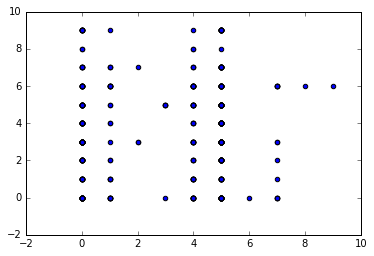

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)

result.Category = result.Category.astype("category")
ax.scatter(result.AssignedLabel,result.Category.cat.codes)



In [50]:
tmp = (result.groupby(['Category','AssignedLabel']).count()).reset_index()
tmp.head()
tmp.pivot(index = "Category",columns="AssignedLabel",values = "Title")

AssignedLabel,0,1,2,3,4,5,6,7,8,9
Category,,,,,,,,,,
Consumer Discretionary,26.0,7.0,NaN,1.0,10.0,27.0,1.0,4.0,NaN,NaN
Consumer Staples,11.0,4.0,NaN,NaN,8.0,11.0,NaN,1.0,NaN,NaN
Energy,15.0,2.0,NaN,NaN,4.0,22.0,NaN,1.0,NaN,NaN
Financials,31.0,1.0,2.0,NaN,8.0,34.0,NaN,2.0,NaN,NaN
Health Care,18.0,2.0,NaN,NaN,4.0,28.0,NaN,NaN,NaN,NaN
Industrials,16.0,2.0,NaN,4.0,9.0,28.0,NaN,NaN,NaN,NaN
Information Technology,12.0,8.0,NaN,NaN,12.0,20.0,NaN,5.0,1.0,1.0
Materials,6.0,3.0,1.0,NaN,3.0,17.0,NaN,NaN,NaN,NaN
Telecommunications Services,2.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN
